# Filter introduction

Whats done here

In this notebooke we will learn how to filter data in the frequency domain. For that we need the basic concept of the fourier transform and the time-frequency concept.
In detail:
- Frequency filtering
- Low-, High-, Bandpass and Bandstop

In [1]:
import numpy as num
import matplotlib.pyplot as plt

from scipy import signal

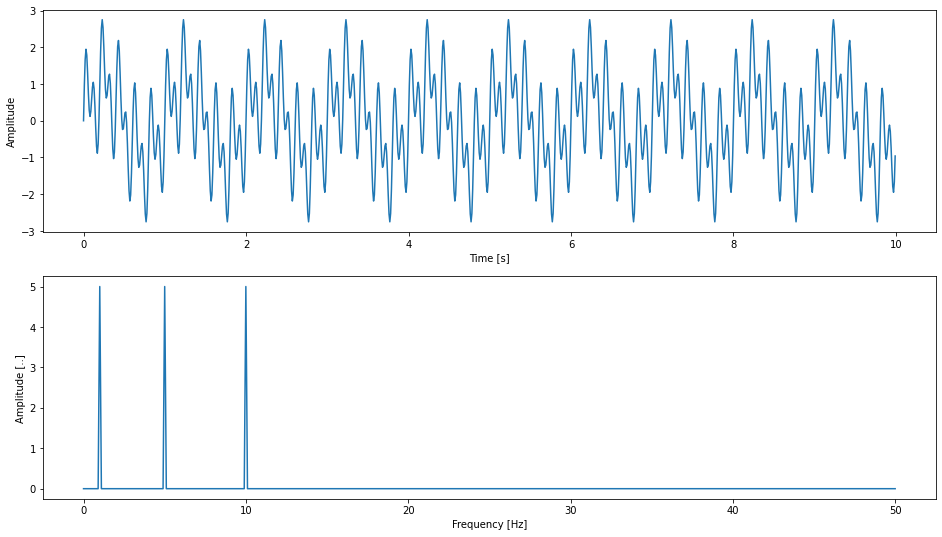

In [2]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Länger der Zeitspur [s]
dt = 1 / df  # Abtastintervall [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Multiple frequencies
fr1 = 1.
fr2 = 10.
fr3 = 5
ydata = num.sin(2 * num.pi * fr1 * x) \
        + num.sin(2 * num.pi * fr2 * x) \
        + num.sin(2 * num.pi * fr3 * x)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

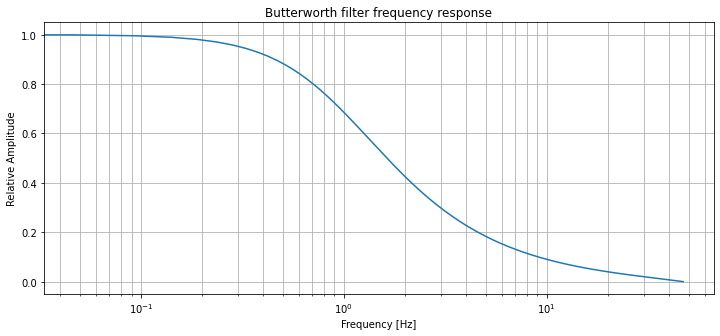

In [3]:
# Filter requirements
filterfreq = 1 # Frequency of the filter
order = 1 # Order of the filter - 'stepness'

nyquist = df / 2. # Nyquist-frequency
ws = filterfreq / nyquist

b, a = sos = signal.butter(order, ws, 'lowpass')
#b, a = sos = signal.butter(order, ws, 'highpass')
w, h = signal.freqz(b, a, int((1/filterfreq) * 1000)) # last argument just to optimize the display quality

weirdfactor = 15 ## there is a weird factor needed to show the response correctly... 

plt.figure(figsize=(12,5))
# plt.plot(w*weirdfactor, abs(h) / max(abs(h)))
plt.semilogx(w*weirdfactor, abs(h) / max(abs(h)))
plt.title('Butterworth filter frequency response')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')

plt.show()

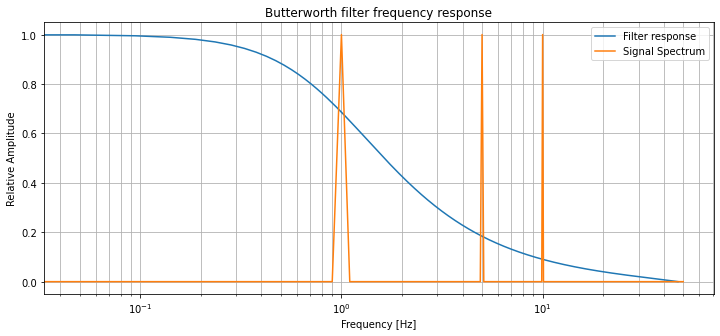

In [4]:
# Plotting filter response and data spectrum
plt.figure(figsize=(12,5))
plt.semilogx(w*weirdfactor, abs(h) / max(abs(h)), label='Filter response')
plt.semilogx(freqs, amps / max(amps), label='Signal Spectrum')

plt.title('Butterworth filter frequency response')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.show()

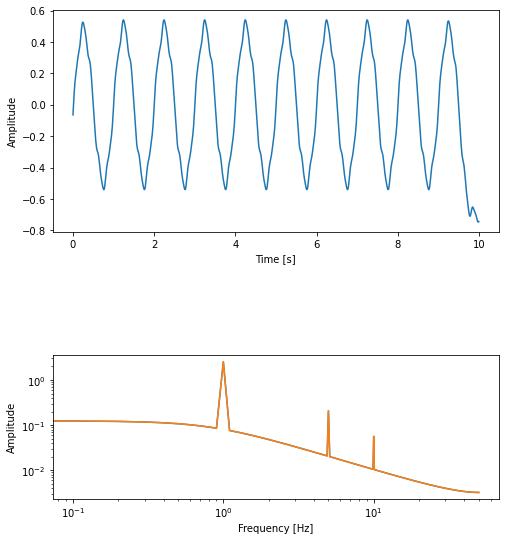

In [5]:
yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(8,9))
ax = plt.subplot(2, 1, 1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax.plot(x, yfilt)
ax = plt.subplot(3, 1, 3)
ax.plot(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.loglog(freqs, amps)

plt.show()

### Tasks
- play with low- and highpas
- play with frequencies
- play with order

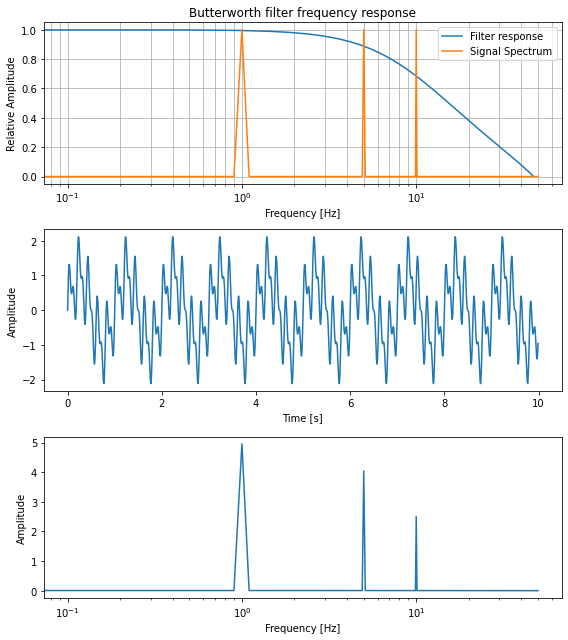

In [6]:
## Filter requirements
filterfreq = 10 # Frequency of the filter
order = 1 # Order of the filter - 'stepness'

nyquist = df / 2. # Nyquist-frequency
ws = filterfreq / nyquist


b, a = sos = signal.butter(order, ws, 'lowpass')
#b, a = sos = signal.butter(order, ws, 'highpass')
w, h = signal.freqz(b, a, int((1/filterfreq) * 1000)) # last argument just to optimize the display quality

weirdfactor = 15 ## there is a weird factor needed to show the response correctly... 

## FFT of original signal
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)

plt.figure(figsize=(8,9))
ax = plt.subplot(3, 1, 1)
ax.semilogx(w*weirdfactor, abs(h) / max(abs(h)), label='Filter response')
ax.semilogx(freqs, amps / max(amps), label='Signal Spectrum')
ax.set_title('Butterworth filter frequency response')
ax.grid(which='both', axis='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Relative Amplitude')
ax.legend()


## Filtering
yfilt = signal.filtfilt(b, a, ydata)

## FFT of filtered signal
amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

## Plotting
ax = plt.subplot(3, 1, 2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax.plot(x, yfilt)
ax = plt.subplot(3, 1, 3)
ax.semilogx(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
#ax.loglog(freqs, amps)

plt.tight_layout()
plt.show()

# Bandpass and Bandstop
Bandpass and -stop are filter combine low- and highpass filters. Therefore, they either supress a certain frequency range or supress everything except that range.

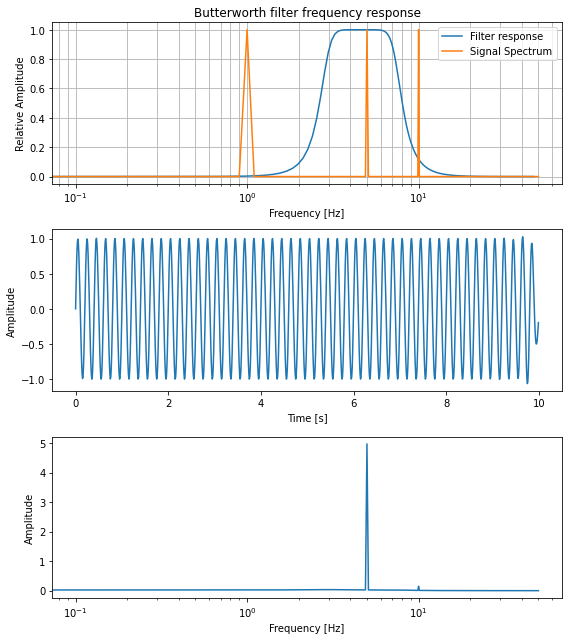

In [8]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Länger der Zeitspur [s]
dt = 1 / df  # Abtastintervall [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Multiple frequencies
fr1 = 1.
fr2 = 10.
fr3 = 5
ydata = num.sin(2 * num.pi * fr1 * x) \
        + num.sin(2 * num.pi * fr2 * x) \
        + num.sin(2 * num.pi * fr3 * x)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)


# Filter requirements.
filterfreq1 = 3
filterfreq2 = 8
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
# b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq1) * 1000)) # last argument just to optimize the display quality


weirdfactor = 15 ## there is a weird factor needed to show the response correctly... 

## FFT of original signal
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)

plt.figure(figsize=(8,9))
ax = plt.subplot(3, 1, 1)
ax.semilogx(w*weirdfactor, abs(h) / max(abs(h)), label='Filter response')
ax.semilogx(freqs, amps / max(amps), label='Signal Spectrum')
ax.set_title('Butterworth filter frequency response')
ax.grid(which='both', axis='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Relative Amplitude')
ax.legend()


## Filtering
yfilt = signal.filtfilt(b, a, ydata)

## FFT of filtered signal
amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

## Plotting
ax = plt.subplot(3, 1, 2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax.plot(x, yfilt)
ax = plt.subplot(3, 1, 3)
ax.semilogx(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
#ax.loglog(freqs, amps)

plt.tight_layout()
plt.show()